In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Gamut as gm

In [5]:
gm.Smoother.CentroidSmoother

Gamut.operators.Smoother.CentroidSmoother

In [6]:
import Gamut.operators.Smoother as Smoother
import Gamut.operators.PeakSearcher as PeakSearcher
import Gamut.operators.AreaCalculator as AreaCalculator
import Gamut.operators.BasicOperator as BasicOperator
import Gamut.operators.OtherOperator as OtherOperator

from Gamut.Operator import Pipe, PipeNet
from Gamut.Spectrum import Spectrum, SimulatedSpectrum, simuspecs

e:\Gamut_dev\Gamut\operators\PeakSearcher.py:205: RuntimeWarning: divide by zero encountered in divide
  weight = 1 / windowed_spectrum
e:\Gamut_dev\Gamut\operators\PeakSearcher.py:212: RuntimeWarning: invalid value encountered in scalar subtract
  variance = sum(weight)*sum(weight*shape**2)-sum(weight*shape)**2
e:\Gamut_dev\Gamut\operators\PeakSearcher.py:214: RuntimeWarning: invalid value encountered in multiply
  covariance = sum(weight)*sum(weight*shape*windowed_spectrum)-sum(weight*windowed_spectrum)*sum(weight*shape)


Spectrum[double_slight|CentroidSmoother[O3]|CentroidSmoother[O3]|Stripper|GaussPeakSearcher[O2]]
Spectrum[double_slight|CentroidSmoother[O3]|CentroidSmoother[O3]|Stripper|DifferentialPeakSearcher[O4]]
Spectrum[double_slight|CentroidSmoother[O3]|CentroidSmoother[O3]|Stripper|CovarianceSearcher[F3]]


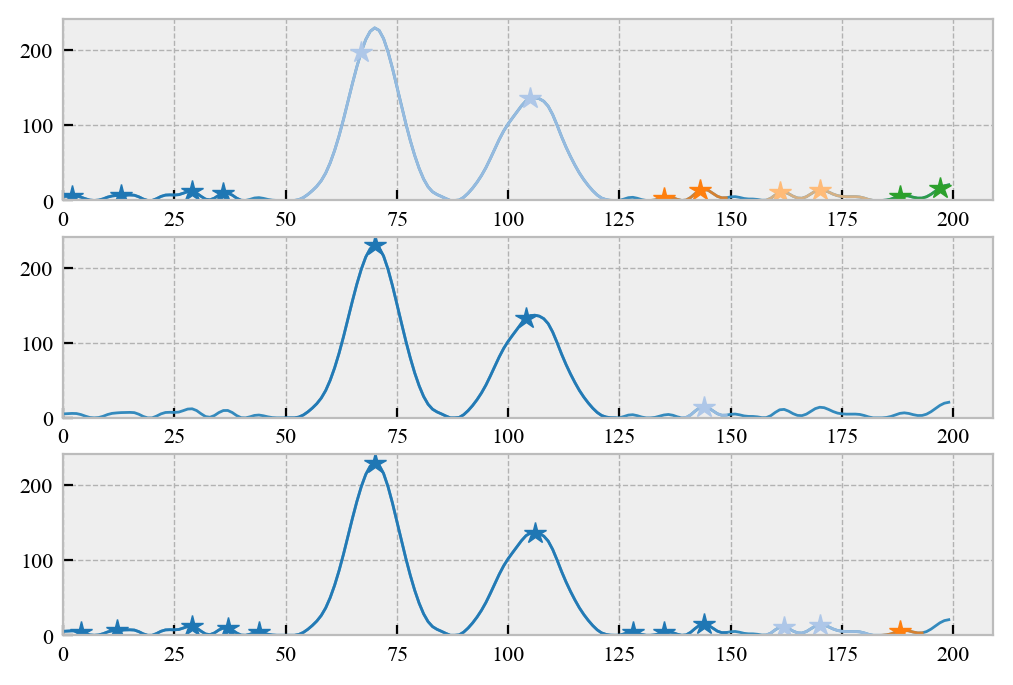

In [13]:
import matplotlib.pyplot as plt

simu = simuspecs['double_slight']
simu = SimulatedSpectrum(**simu)

cen = Smoother.CentroidSmoother(3)
strp = OtherOperator.SNIPStripper(10)
minus = BasicOperator.Stripper()

diff = PeakSearcher.DifferentialPeakSearcher(4, 3, 1, 2, 0.4)
gauss = PeakSearcher.GaussPeakSearcher(2, 0.05)
cov = PeakSearcher.CovarianceSearcher(2, 3)

smoothed = cen(cen(simu))
base = strp(cen(cen(simu)))
stripped = minus([cen(cen(simu)), base])

gaussspe = gauss(stripped)
diffspe = diff(stripped)
covspe = cov(stripped)

fig, axe = plt.subplots(3, 1)
for i, spe in enumerate([gaussspe, diffspe, covspe]):
    spe.plot(axes=axe[i])
    spe.plot_regions(axes=axe[i])
    print(spe)
fig.savefig("compare.png")